# Image Recognition: MNIST Dataset
In this example we will work on Digit Recognition with the <strong>MNIST Dataset</strong>.<br>
<p style="text-align:center;"><img src="Example3/mnist_image.png"></p><br>
This Dataset contains for each image the values of its  784=28×28  greyscale pixels and the value of the Digit

## 1. Importing MNIST
### Reading from a CSV file
The code below imports the <strong>MNIST dataset</strong> (both training and testing) from csv files.<br>
It then it shows a sample from the dataset

In [2]:

import numpy as np
import cv2
#sklearn.datasets contains some predefined datasets
import sklearn.datasets as ds
#pandas is used for data manipulation
import pandas as pd
#matplotlib.pyplot is used for visualisation
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
#seaborn is a user friendly library for visualisation built on top of matplotlib
import seaborn as sns
#we will use a Classification Model called SVC: Support Vector Classifier
import sklearn.datasets as ds
from sklearn.svm import SVC
#we will compare it to a linear Model: LogisticRegression
from sklearn.linear_model import LogisticRegression
#we will split the data using train_test_split
from sklearn.model_selection import train_test_split
#OPTIONAL: This is for evaluating a classification model
from sklearn.metrics import confusion_matrix
print("Libraries are Imported")
class ImagePredictor:
    def __init__(self,model,dim,max_val=255):
        self.model=model
        self.dim=dim
        self.max_val=max_val
        pass
    
    def fit(X,y):
        model.fit(np.reshape(X,[X.shape[0],dim[0]*dim[1]]),y)
        return self
#Predict a Single Image
    def predict_one(self,img,pix_max_val=255,invert=False):
        img2=np.copy(img)
        img2 = img2.astype(np.float64)
        img2=cv2.resize(img2,self.dim)
        img2= img2*self.max_val/pix_max_val
        if invert:
            img2=self.max_val-img2 
        return self.model.predict([img2.flatten()])[0]
#Predict an array of images (a 3D Array)
    def predict(self,img,pix_max_val=255,invert=False):
        img=img.astype(np.float64)
        img2 = np.zeros([img.shape[0],*self.dim])
        for k in range(img.shape[0]):
            img2[k,:,:]=cv2.resize(img[k,:,:],self.dim)
            img2[k,:,:]= img2[k,:,:]*self.max_val/pix_max_val
            if invert:
                img2[k,:,:]=self.max_val-img2[k,:,:]
#        return np.array([self.predict_one(img2[s,:,:]) for s in range(img.shape[0]) ])
        return self.model.predict(np.reshape(img2,[img2.shape[0],self.dim[0]*self.dim[1]]))
    def score(self,X,y,pix_max_val=255,invert=False):
        return (self.predict(X,pix_max_val,invert)==y).mean()
    
    def unroll(img,pix_max_val=255,invert=False):
        img2 = np.zeros([img.shape[0],*self.dim])
        for k in range(img.shape[0]):
            img2[k,:,:]=cv2.resize(img[k,:,:],self.dim)
            img2[k,:,:]= img2[k,:,:]*self.max_val/pix_max_val
            if invert:
                img2[k,:,:]=self.max_val-img2[k,:,:]
        return img2
        
    pass

#The list of file names for the custom images
file_name_list=["2.png","3.png","8.jpg","4.bmp","5.bmp","5_2.bmp","6.bmp","7.bmp","7.jpg","9.bmp","9.jpg","8.bmp"]
#The digit value of each image, in order
digit_values=np.array([2,3,8,4,5,5,6,7,7,9,9,8])
#Creating a 3D array(Tensor) of 28x28 images
custom_images = np.array([cv2.resize(cv2.imread("Example3/{}".format(s),cv2.IMREAD_GRAYSCALE),(28,28)) 
        for s in file_name_list])
print("Good Job!")

Libraries are Imported
Good Job!


In [3]:
mnist_train=pd.read_csv("Example3/mnist_train.csv")
mnist_test=pd.read_csv("Example3/mnist_test.csv")
mnist_train.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating $X$ & $y$ arrays

In [4]:
X_mnist_train = mnist_train[mnist_train.columns[1:]]
y_mnist_train=mnist_train["label"]
X_mnist_test = mnist_test[mnist_test.columns[1:]]
y_mnist_test=mnist_test["label"]
#To Save Some memory
mnist_train=None
mnist_test=None

## 2. Viewing some digits
Feel free to change <code>ncols</code> and <code>nrows</code>, we recommend you set each one of them between $1$ & $5$

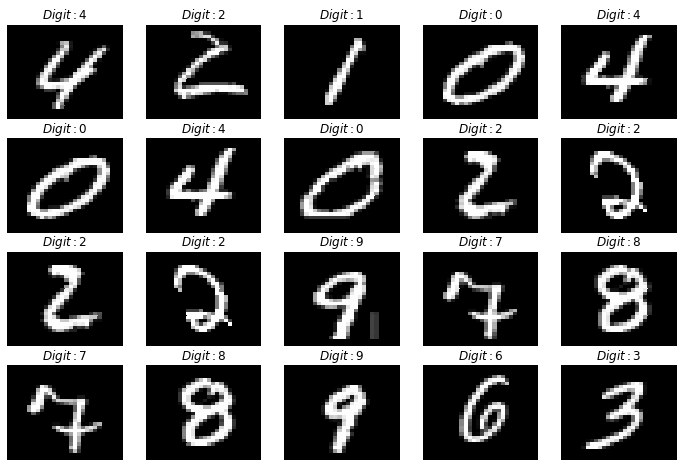

In [5]:
#Ploting MNIST digits
fig = plt.figure(figsize=(12,8))
#This is the number of columns of the plot
ncols=5
#This is the number of rows of the plot
nrows=4
spec = grd.GridSpec(ncols=ncols,nrows=nrows)
X_mnist_sample=X_mnist_train.sample(nrows*ncols)
y_mnist_sample=y_mnist_train[X_mnist_sample.index]
for i in range(nrows):
    for j in range(ncols):
        d=3*i+j
        ax = fig.add_subplot(spec[i,j])
        digit_matrix=np.reshape(X_mnist_sample.iloc[d,:].to_numpy(),[28,28])
        ax=sns.heatmap(digit_matrix,cmap="gray",ax=ax,cbar=False,xticklabels=False,yticklabels=False)
        ax.set_title("$Digit: {}$".format(y_mnist_sample.iloc[d]))

## 3. Useful Image Operations
### a. Convolution
A <strong>convolution</strong> is an <strong>operation</strong> on <strong>image</strong> which <strong>gives</strong> an other <strong>image</strong>. It is usually used for sharpening, blurring and edge detection.
<br>
<p style="text-align:center">"<img src="Example3/convolution_image.jpg"><br>
    <strong style="color:blue;">How It Works</strong><br>
"<img src="Example3/convolution2.png" width="480" height="480"><br>
"<img src="Example3/convolution.gif" width="640" height="640"></p>

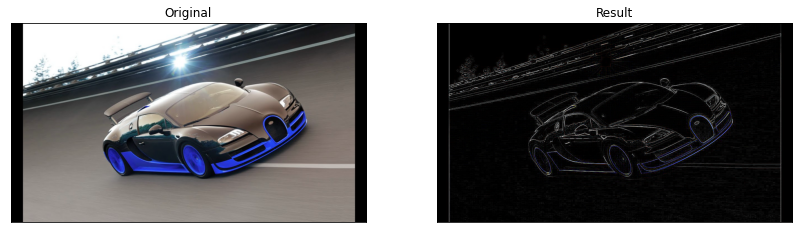

In [15]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('Example3/bugatti.jpg')
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
dst = cv.filter2D(img,-1,kernel)
fig,ax=plt.subplots(1,2,figsize=(14,6))
ax[0].imshow(img),ax[0].set_title('Original')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(dst),ax[1].set_title('Result')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

### b. Max Pooling
<strong> Pooling</strong> is a similar operation <strong>convolution</strong>

<p style="text-align:center"><img src="Example3/pooling.png" width="480" height="480"></p>

## 4. Creating MNIST Model: <strong>Convolutional Neural Network</strong>
A <strong>Convolutional Neural Network</strong> Is a neural network with some convolution layers
<p style="text-align:center"><img src="Example3/cnn.png" width="640" height="640"></p>


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt

deep_model = tf.keras.Sequential([
#A convolution: for edge detection (hopefully)
    tf.keras.layers.Conv2D(32,3,activation="relu",input_shape=(28,28,1),kernel_initializer="he_uniform"),
#Normalizing Data, similar to StandardScaler in classical machine learning
    tf.keras.layers.BatchNormalization(),
#Max pooling layer, to extract the pixel with maximum edge value
    tf.keras.layers.MaxPooling2D((2,2)),
#Converting each matrix (image) to vector 
    tf.keras.layers.Flatten(),
#From now we have a standard neural network
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_uniform"),
        tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation="softmax")
])

Using TensorFlow backend.


## 4. Fitting CNN
This may seem like some <strong>cryptic code,</strong> but just a little practice and you will get used to it.<br>
This code compile the <strong>CNN</strong> (Convolutional Neural Network):
- The Used Mathematical optimiser is the Stochastic Gradient Descent with learning rate $\alpha=0.01$ and momentum $\mu=0.9$
- The Loss Function $\mathcal{L}$ is the Categorical Cross Entropy
- Let $n$ be the number of observations (<code>n=X.shape[0]</code>), The input $X$ is converted to NumPy array $X'$, rescaled, and converted to the shape $s=(n,28,28,1)$.
- $y$ is converted using the function <code>to_categorical</code> to a categorical format $y'$
- The model is fit against $X'$ and $y'$

<h3 style="color:red;"><strong>WARNING:</strong></h3>
The training can take <strong>$10$ minutes </strong>..<br>
What about playing some card games?

In [9]:
#Invert greyscale of an image, max_col is the maximum value of a colour
def invert(img,max_color=255):
    return max_color-img

#Rescale pixel values to the closed interval [0,1]
def rescale(img,max_color=255):
    return img/max_color

#Add a dummy dimension
def convert_img_dataset(X,n1,n2):
    return np.reshape(X,[X.shape[0],n1,n2,1]) 

#This Neural Network will be optimized with Stochastic Gradient Descent (SGC) with learning rate 0.01 and momentum 0.9
#The loss function is the Categorical Cross Entropy (Categorical Logistic Loss Function)
#The metric of the loss is accuarcy
deep_model.compile(optimizer=SGD(lr=0.01,momentum=0.9),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
deep_model.fit(convert_img_dataset(rescale(X_mnist_train.to_numpy().astype(np.float32)),28,28),
          to_categorical(y_mnist_train),epochs=3,batch_size=32)
print("CNN Model is now fit")

Epoch 1/3
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0203 - accuracy: 0.9943
Epoch 2/3
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0133 - accuracy: 0.9962
Epoch 3/3
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0110 - accuracy: 0.9969
CNN Model is now fit


## 4. MNIST Model Evaluation

In [8]:
def add_dummy_dimension(I):
    return np.reshape(I,[*I.shape,1])

cnn_testing_eval=deep_model.evaluate(rescale(convert_img_dataset(X_mnist_test.to_numpy(),28,28)),to_categorical(y_mnist_test))
cnn_custom_eval=deep_model.evaluate(add_dummy_dimension(rescale(invert(custom_images))),to_categorical(digit_values))
print("Testing Dataset Accuarcy: {:.3f}".format(cnn_testing_eval[1]))
print("Custom Images Accuarcy: {:.3f}".format(cnn_custom_eval[1]))


1/1 [==============================] - 0s 32ms/step - loss: 0.5706 - accuracy: 0.8333
Testing Dataset Accuarcy: 0.986
Custom Images Accuarcy: 0.833
